# Изучим данные по экзопланетам
#### Источник https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html

In [66]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('exoplanets.csv', parse_dates=['rowupdate'])

In [3]:
df.head()

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_ttvflag,pl_kepflag,pl_k2flag,ra_str,dec_str,ra,st_raerr,dec,st_decerr,st_posn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility
0,HD 128311,c,HD 128311 c,Radial Velocity,0,2,921.53800,1.15000,-1.15000,0.0,4,1.7400,0.01,-0.01,0.0,3,0.159,0.006,-0.006,0.0,4,55.95,14.553,-14.553,0.0,1,3.789,0.924,-0.432,0.0,5,Mass,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,14h36m00.56s,+09d44m47.5s,219.002335,0.000002,9.746518,0.000002,3,16.52,0.04,-0.04,0.0,7,7.510,0.050,0.0,V (Johnson),7.167,NaN,0.0,NaN,NaN,NaN,NaN,7,0.83,0.01,-0.01,0.0,10,0.76,0.02,-0.02,0.0,5,1,2015-06-25,W. M. Keck Observatory
1,HD 129445,b,HD 129445 b,Radial Velocity,0,1,1840.00000,55.00000,-55.00000,0.0,1,2.9000,0.20,-0.20,0.0,1,0.700,0.100,-0.100,0.0,1,NaN,NaN,NaN,0.0,0,1.600,0.600,-0.600,0.0,1,Msini,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,0,0,0,14h46m03.07s,-68d45m45.9s,221.512772,0.000002,-68.762749,0.000003,2,67.57,0.16,-0.16,0.0,2,8.800,NaN,0.0,V (Johnson),8.618,NaN,0.0,NaN,NaN,NaN,NaN,2,0.99,NaN,NaN,0.0,2,NaN,NaN,NaN,NaN,1,0,2019-01-31,Las Campanas Observatory
2,HD 130322,b,HD 130322 b,Radial Velocity,0,1,10.70871,0.00018,-0.00018,0.0,3,0.0925,NaN,NaN,0.0,3,0.029,0.016,-0.016,0.0,3,NaN,NaN,NaN,NaN,0,1.150,NaN,NaN,0.0,3,Msini,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,14h47m32.73s,-00d16m53.3s,221.886368,0.000003,-0.281476,0.000003,2,31.91,0.07,-0.07,0.0,4,8.031,0.016,0.0,V (Johnson),7.834,NaN,0.0,5387.0,44.0,-44.0,0.0,9,0.92,0.03,-0.03,0.0,8,0.85,0.04,-0.04,0.0,4,0,2015-02-19,La Silla Observatory
3,HD 131496,b,HD 131496 b,Radial Velocity,0,1,896.00000,16.00000,-16.00000,0.0,3,2.0100,0.12,-0.12,0.0,3,0.181,0.060,-0.060,0.0,3,NaN,NaN,NaN,0.0,0,1.800,0.100,-0.100,0.0,3,Msini,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0,0,0,0,14h53m23.03s,+18d14m07.4s,223.345947,0.000002,18.235401,0.000002,2,132.34,1.15,-1.15,0.0,2,7.800,NaN,0.0,V (Johnson),7.521,NaN,0.0,4846.0,NaN,NaN,0.0,5,1.34,NaN,NaN,0.0,4,4.44,NaN,NaN,0.0,5,0,2018-12-06,W. M. Keck Observatory
4,HD 132406,b,HD 132406 b,Radial Velocity,0,1,974.00000,39.00000,-39.00000,0.0,2,1.9800,0.06,-0.06,0.0,2,0.340,0.090,-0.090,0.0,2,NaN,NaN,NaN,0.0,0,5.380,1.310,-1.310,0.0,2,Msini,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,0.0,0,0,0,0,14h56m54.65s,+53d22m55.8s,224.227707,0.000002,53.382168,0.000002,2,70.93,0.14,-0.14,0.0,2,8.467,0.013,0.0,V (Johnson),8.281,NaN,0.0,5783.0,38.0,-38.0,0.0,3,1.03,0.15,-0.15,0.0,2,1.34,0.04,-0.04,0.0,3,0,2018-09-06,Haute-Provence Observatory


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 82 columns):
pl_hostname        4116 non-null object
pl_letter          4116 non-null object
pl_name            4116 non-null object
pl_discmethod      4116 non-null object
pl_controvflag     4116 non-null int64
pl_pnum            4116 non-null int64
pl_orbper          3996 non-null float64
pl_orbpererr1      3865 non-null float64
pl_orbpererr2      3865 non-null float64
pl_orbperlim       4042 non-null float64
pl_orbpern         4116 non-null int64
pl_orbsmax         2436 non-null float64
pl_orbsmaxerr1     1627 non-null float64
pl_orbsmaxerr2     1626 non-null float64
pl_orbsmaxlim      2607 non-null float64
pl_orbsmaxn        4116 non-null int64
pl_orbeccen        1434 non-null float64
pl_orbeccenerr1    999 non-null float64
pl_orbeccenerr2    999 non-null float64
pl_orbeccenlim     1716 non-null float64
pl_orbeccenn       4116 non-null int64
pl_orbincl         880 non-null float64
pl_orbin

In [5]:
df.describe()

,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_ttvflag,pl_kepflag,pl_k2flag,ra,st_raerr,dec,st_decerr,st_posn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_optmag,st_optmagerr,st_optmaglim,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes
count,4116.000000,4116.000000,3.996000e+03,3.865000e+03,3.865000e+03,4042.000000,4116.000000,2436.00000,1627.000000,1626.000000,2607.000000,4116.000000,1434.000000,999.000000,999.000000,1716.000000,4116.000000,880.000000,839.000000,841.000000,1533.000000,4116.000000,1666.000000,1524.000000,1524.000000,1916.000000,4116.000000,3162.000000,3129.000000,3129.000000,3638.000000,4116.000000,493.000000,475.000000,475.000000,1388.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,3992.000000,4116.000000,3992.000000,4116.000000,4110.000000,4034.000000,4034.000000,4110.0,4116.000000,3916.000000,979.000000,3916.0,3961.000000,0.0,3961.0,3883.000000,3706.000000,3679.000000,4003.000000,4116.000000,3350.000000,3109.000000,3083.000000,3357.0,4116.000000,3755.000000,3628.000000,3603.000000,3913.0,4116.000000,4116.000000
mean,0.004373,1.775996,2.301087e+03,1.034078e+03,-1.061237e+03,-0.000495,2.766278,9.15170,0.450174,-0.452073,-0.000384,1.061953,0.160573,0.066256,-0.054695,0.062937,0.758503,86.197260,1.018386,-1.068170,-0.001957,0.495141,2.516171,0.604849,-0.476574,0.034447,0.928328,0.377628,0.055235,-0.043017,-0.000550,1.976433,2.555653,0.754806,-0.688124,0.008646,0.328717,0.074830,0.572400,0.103741,244.048243,0.000013,22.894763,0.000012,1.881924,633.332504,76.404435,-57.539137,0.0,2.755102,12.675046,0.047286,0.0,12.568770,NaN,0.0,5492.019591,100.038972,-102.036080,0.000250,4.608115,1.002830,0.148527,-0.144288,0.0,2.384597,1.541686,0.269821,-0.213472,0.0,4.412536,0.632896
std,0.065993,1.157727,1.158522e+05,5.878678e+04,5.898431e+04,0.038530,1.659404,121.42603,5.661248,5.927361,0.019585,1.240586,0.187565,0.061647,0.049653,0.263640,1.271613,8.461919,2.970361,2.099108,0.057095,1.192005,4.442608,3.383309,2.433623,0.209097,1.529448,0.428670,0.178284,0.125009,0.033159,1.652180,5.165662,2.786804,2.753813,0.107056,0.922810,0.263149,0.494791,0.304962,86.813465,0.000009,32.882212,0.000008,0.625621,830.810070,183.094056,179.324265,0.0,0.998071,2.967894,0.065786,0.0,2.992538,NaN,0.0,1763.442572,63.387549,76.084484,0.015805,2.001390,0.649487,1.874089,1.881828,0.0,1.865996,3.695774,2.603131,1.950781,0.0,2.139799,0.532379
min,0.000000,1.000000,9.070629e-02,0.000000e+00,-3.650000e+06,-1.000000,0.000000,0.00440,0.000000,-200.000000,-1.000000,0.000000,0.000000,0.000000,-0.470000,-1.000000,0.000000,7.700000,0.000000,-25.000000,-1.000000,0.000000,0.000060,0.000000,-78.550000,-1.000000,0.000000,0.030000,0.000000,-4.870000,-1.000000,0.000000,0.030000,0.009000,-55.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.325750,0.000000,-84.231613,0.000000,1.000000,1.300000,0.000000,-2190.000000,0.0,0.000000,0.850000,0.000000,0.0,2.804000,NaN,0.0,575.000000,3.000000,-2360.240000,0.000000,0.000000,0.010000,0.000000,-97.100000,0.0,0.000000,0.010000,0.000000,-73.630000,0.0,0.000000,0.000000
25%,0.000000,1.000000,4.487088e+00,1.600000e-05,-1.271000e-03,0.000000,2.000000,0.05700,0.000810,-0.040000,0.000000,0.000000,0.015000,0.020000,-0.080000,0.000000,0.000000,86.065000,0.200000,-1.000000,0.000000,0.000000,0.081515,0.014000,-0.250000,0.000000,0.000000,0.140000,0.013000,-0.047000,0.000000,1.000000,0.411000,0.070500,-0.570000,0.000000,0.000000,0.000000,0.000000,0.00000

## Лучше всего заполнены данные:
1. pl_orbper - Кол-во дней оборота вокруг звезды
2. pl_radj - Радиус планеты
3. ra - Прямое восхождение
4. dec - Склонение
5. st_dist - Расстояние до планетной системы в парсеках
6. st_optmag - Яркость звезды
7. st_teff - Температура звезды
8. st_mass - Звездная масса
9. st_rad - Радиус звезды

#### Изучим данные в них:
Построим гистрограммы этих параметров:

In [6]:
columnes = {'pl_orbper': 'Кол-во дней оборота вокруг звезды', 
            'pl_radj': 'Радиус планеты', 
            'ra': 'Прямое восхождение', 
            'dec': 'Склонение', 
            'st_dist': 'Расстояние до планетной системы в парсеках', 
            'st_optmag': 'Яркость звезды', 
            'st_teff': 'Температура звезды', 
            'st_mass': 'Звездная масса', 
            'st_rad': 'Радиус звезды',
            }

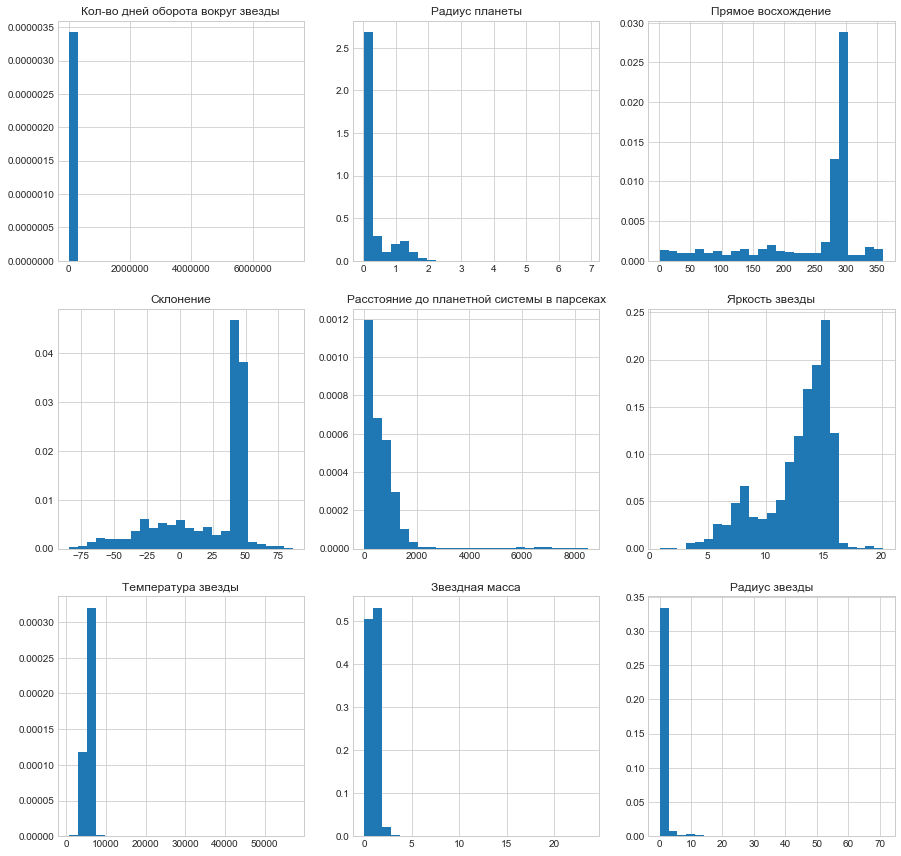

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(15, 15)
axf = ax.flatten()

i = 0
for col, title in columnes.items():
    axf[i].hist(df[col], density=True, bins=25)
    axf[i].set_title(title)
    i += 1
plt.show()

Изучим данные по расстоянию до планетной системы в парсеках:

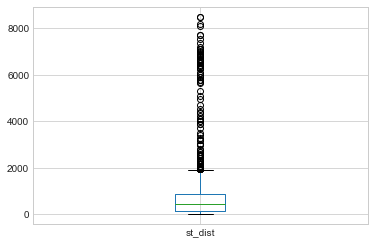

In [8]:
df[["st_dist"]].boxplot()

In [9]:
q1 = df['st_dist'].quantile(0.25)
q3 = df['st_dist'].quantile(0.75)
iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-912.4062500000002, 1926.6437500000002)

In [10]:
outliers = df.loc[(df['st_dist'] < boxplot_range[0]) | (df['st_dist'] > boxplot_range[1])]
df2 = df.loc[(df['st_dist'] > boxplot_range[0]) & (df['st_dist'] < boxplot_range[1])]
dist_count = df['st_dist'].count()

In [11]:
print(f'Из {dist_count} планет всего {outliers.shape[0]} планеты открыто на расстоянии более {round(boxplot_range[1], 2)} парсек от Земли. \n\
Можно их посчитать выбросом в нашей выборке по этой характеристике. \n\
Доля выбросов: {round(outliers.shape[0] / df.shape[0] * 100, 3)}%')

Из 4110 планет всего 103 планеты открыто на расстоянии более 1926.64 парсек от Земли. 
Можно их посчитать выбросом в нашей выборке по этой характеристике. 
Доля выбросов: 2.502%


Посмотрим на яркость звезды и построим теоретическую функцию плотности::

In [12]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

In [13]:
loc = df['st_optmag'].mean()
scale = df['st_optmag'].std(ddof=1)

loc, scale

(12.675046220633316, 2.967893885418491)

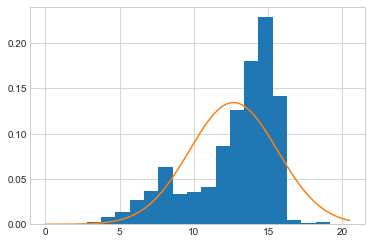

In [14]:
ox = np.linspace(0, 20.5, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(df['st_optmag'], density=True, bins=20)
plt.plot(ox, oy)

Изучим данные по Температуре звезды:

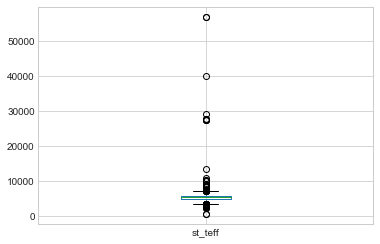

In [15]:
df[["st_teff"]].boxplot()

In [16]:
q1 = df['st_teff'].quantile(0.25)
q3 = df['st_teff'].quantile(0.75)
iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(3664.0, 7280.0)

In [17]:
outliers = df.loc[(df['st_teff'] < boxplot_range[0]) | (df['st_teff'] > boxplot_range[1])]
df2 = df.loc[(df['st_teff'] > boxplot_range[0]) & (df['st_teff'] < boxplot_range[1])]
t_count = df['st_teff'].count()

In [18]:
print(f'Из {t_count} планет всего {outliers.shape[0]} планеты с яркостью выше {round(boxplot_range[1], 2)} или ниже {round(boxplot_range[0], 2)}. \n\
Можно их посчитать выбросом в нашей выборке по этой характеристике. \n\
Доля выбросов: {round(outliers.shape[0] / df.shape[0] * 100, 3)}%')

Из 3883 планет всего 192 планеты с яркостью выше 7280.0 или ниже 3664.0. 
Можно их посчитать выбросом в нашей выборке по этой характеристике. 
Доля выбросов: 4.665%


Построим теоретическую функцию плотности по выборке без выбросов:

In [19]:
loc = df2['st_teff'].mean()
scale = df2['st_teff'].std(ddof=1)

loc, scale

(5490.854871308588, 629.4797845190152)

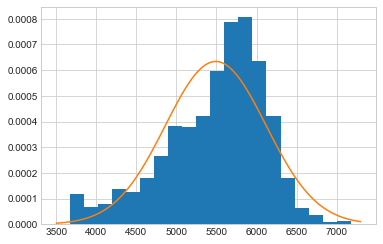

In [20]:
ox = np.linspace(3500, 7300, 100)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(df2['st_teff'], density=True, bins=20)
plt.plot(ox, oy)

#### Проверим полученное распределение температуры звезды на нормальность с помощью критерия Колмогорова-Смирнова:

In [21]:
a = df2['st_teff'].mean()
sigma = df2['st_teff'].std(ddof=1)

n = df2['st_teff'].shape[0]

a, sigma, n

(5490.854871308588, 629.4797845190152, 3691)

In [22]:
def edf(x: float) -> float:
    """Эмпирическая функция распределения веса хоккеистов.
    """
    
    samples = df['st_teff']
    
    return samples[samples < x].shape[0] / samples.shape[0]

In [23]:
cdf = stats.norm(loc=a, scale=sigma).cdf

In [24]:
ox = np.array(df2['st_teff'])
oy = np.array([np.abs(edf(x) - cdf(x)) for x in ox])

In [25]:
x_max = 0
y_max = 0

for x, y in zip(ox, oy):
    if y > y_max:
        x_max = x
        y_max = y
        
x_max, y_max

(5593.0, 0.09846663867268862)

Найдем критическое значение для $\alpha = 0.05$ и $n = 3691$ оно равно $0.886 / \sqrt{n}$:

In [26]:
0.886 / np.sqrt(n)

0.01458349776068107

Поскольку полученное значение статистики 0.098 больше критического 0.0146, то __распределение в выборке нельзя считать нормальным__.

#### Посчитаем коэффициент корреляции Пирсона между выбранными признаками:

In [27]:
df[[col for col in columnes.keys()]].corr()

,pl_orbper,pl_radj,ra,dec,st_dist,st_optmag,st_teff,st_mass,st_rad
pl_orbper,1.000000,0.062702,0.001027,-0.028007,-0.016649,-0.113364,-0.027340,-0.024978,0.058913
pl_radj,0.062702,1.000000,-0.326029,-0.458121,-0.066541,-0.336859,0.228074,0.335930,0.394268
ra,0.001027,-0.326029,1.000000,0.453702,0.252876,0.463492,0.063446,-0.054273,-0.122785
dec,-0.028007,-0.458121,0.453702,1.000000,0.067371,0.498526,0.036124,0.036964,-0.008073
st_dist,-0.016649,-0.066541,0.252876,0.067371,1.000000,0.610261,0.217009,-0.063266,-0.023660
st_optmag,-0.113364,-0.336859,0.463492,0.498526,0.610261,1.000000,-0.032792,-0.234366,-0.349596
st_teff,-0.027340,0.228074,0.063446,0.036124,0.217009,-0.032792,1.000000,0.111116,-0.077820
st_mass,-0.024978,0.335930,-0.054273,0.036964,-0.063266,-0.234366,0.111116,1.000000,0.523559
st_rad,0.058913,0.394268,-0.122785,-0.008073,-0.023660,-0.349596,-0.077820,0.523559,1.000000


Максимальная по модулю корреляция 0.61 наблюдается между признаками __st_dist__ (Расстояние до планетной системы) и __st_optmag__ (Яркость звезды). Очевидно, чем дальше от нас система, тем сложней найти планету на фоне менее яркой звезды.

Зависимость явно не линейная, но построим график уравнения линейной регрессии, чтобы убедиться в этом, предварительно очистив данные от пустых значений:

In [28]:
df3 = df[df["st_optmag"].notnull()]
df3 = df3[df3["st_dist"].notnull()]
df3.shape

(3915, 82)

Text(0, 0.5, 'Расстояние до системы')

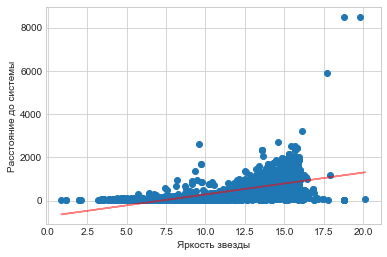

In [30]:
b1 = df3[['st_optmag', 'st_dist']].cov().iloc[0, 1] / df3['st_optmag'].var(ddof=1)
b0 = df3['st_dist'].mean() - b1 * df3['st_optmag'].mean()

x = np.array(df3['st_optmag'])
y = np.array(df3['st_dist'])
z = b0 + b1 * x


plt.scatter(df3[["st_optmag"]], df3[["st_dist"]])
plt.plot(x, z, color='red', alpha=0.5)

plt.xlabel('Яркость звезды')
plt.ylabel('Расстояние до системы')

Посчитаем коэффициент детерминации для уравнения парной регрессии:

In [31]:
r2 = 1 - (z - y).var() / y.var()
r2

0.3724182001844859

Коэффициент детерминации низкий, как и ожидалось. Т.о. полученная модель линейной регрессии плохо описывает взаимосвязь этих показателей.

Посчитаем среднюю ошибку аппроксимации:

In [32]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [33]:
mean_approximation_error(y, z)

2.955916062141368

Ошибка аппроксимации в разы превышает допустимый уровень 8-10%

#### Оценим построенное уравнение регрессии с помощью F-критерия Фишера

In [34]:
k1 = 1
k2 = n - k1 - 1

f1 = (r2 / k1) / ((1 - r2) / k2)
f1

2189.1182008216774

Для уровня значимости $\alpha = 0.05$ посчитаем значение $F_{crit}$:

In [35]:
alpha = 0.05

f_crit = stats.f.ppf(1 - alpha, k1, k2)
f_crit

3.843980820902685

Имеем $F > F_{crit}$, поэтому уравнение регрессии статистически значимо.

#### Построим для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента

In [36]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [37]:
s_slope = standard_error_slope(x, y, z)
s_slope

2.0960176323359088

Зададим уровень доверия $p = 0.95$, т.е. $\alpha = 0.05$

In [38]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=n-1)
t

1.9606070838145286

Доверительный интервал для параметра $b_1$:

In [41]:
display(b1)
(b1 - t * s_slope, b1 + t * s_slope)

101.0020373029339

(96.89257028517596, 105.11150432069184)

Аналогично для параметра $b_0$:

In [42]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [43]:
s_intercept = standard_error_intercept(x, y, z)
s_intercept

27.284404957633072

Доверительный интервал для параметра $b_0$:

In [44]:
display(b0)
(b0 - t * s_intercept, b0 + t * s_intercept)

-728.8366309136422

(-782.330628551242, -675.3426332760425)

#### Посмотрим на ранговую зависимость между признаками:

In [45]:
df[[col for col in columnes.keys()]].corr(method='kendall')

,pl_orbper,pl_radj,ra,dec,st_dist,st_optmag,st_teff,st_mass,st_rad
pl_orbper,1.000000,0.078468,-0.051660,-0.030460,-0.100928,-0.179191,-0.024805,0.081636,0.118212
pl_radj,0.078468,1.000000,-0.071123,-0.182041,0.047246,-0.067319,0.159597,0.232212,0.222583
ra,-0.051660,-0.071123,1.000000,0.264794,0.261450,0.258139,0.083788,0.017866,-0.031145
dec,-0.030460,-0.182041,0.264794,1.000000,0.293113,0.299355,0.043465,0.039659,-0.044804
st_dist,-0.100928,0.047246,0.261450,0.293113,1.000000,0.541071,0.286462,0.118258,0.129496
st_optmag,-0.179191,-0.067319,0.258139,0.299355,0.541071,1.000000,-0.090965,-0.245845,-0.326428
st_teff,-0.024805,0.159597,0.083788,0.043465,0.286462,-0.090965,1.000000,0.645174,0.604293
st_mass,0.081636,0.232212,0.017866,0.039659,0.118258,-0.245845,0.645174,1.000000,0.828871
st_rad,0.118212,0.222583,-0.031145,-0.044804,0.129496,-0.326428,0.604293,0.828871,1.000000


Наибольшее значение коэффициента корреляции Кендалла 0.83 наблюдается между признаками __st_rad__ (Радиус звезды) и __st_mass__ (Звездная масса).

### Проведем дисперсионный анализ

Проверим гипотезу о различиях в признаках, относящихся к свойствам звезд: st_dist, st_optmag, st_teff, st_mass, st_rad - в зависимости от того, чем были измерены параметры звезд: значения из st_optband.

In [46]:
params = ['st_dist', 'st_optmag', 'st_teff', 'st_mass', 'st_rad']

Уберем наблюдения с пустыми значениями из датафрейма:

In [48]:
df4 = df3[df3["st_rad"].notnull()]
df4 = df4[df4["st_teff"].notnull()]
df4 = df4[df4["st_mass"].notnull()]
df4.shape

(2855, 82)

Всего у нас два метода (или аппарата), которыми были измерены звезды:

In [49]:
df4["st_optband"].value_counts()

Kepler-band    1514
V (Johnson)    1341
Name: st_optband, dtype: int64

Разобъем данные на две группы:

In [50]:
y1 = df4.loc[df4['st_optband'] == 'Kepler-band', params]
y2 = df4.loc[df4['st_optband'] == 'V (Johnson)', params]

n1 = y1.shape[0]
n2 = y2.shape[0]

n1, n2

(1514, 1341)

Статистики по каждой группе:

In [51]:
y1.describe()

,st_dist,st_optmag,st_teff,st_mass,st_rad
count,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000
mean,774.010376,14.341849,5524.160145,0.964815,1.013038
std,387.052264,1.230339,658.644008,0.207006,0.387501
min,37.810000,8.769000,3157.000000,0.180000,0.210000
25%,481.100000,13.654250,5214.000000,0.850000,0.800000
50%,751.000000,14.604000,5663.500000,0.970000,0.950000
75%,1027.000000,15.264750,5954.000000,1.080000,1.140000
max,2700.000000,17.475000,8480.000000,1.720000,6.300000


In [52]:
y2.describe()

,st_dist,st_optmag,st_teff,st_mass,st_rad
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,230.971320,10.555851,5327.274996,1.103870,2.482252
std,280.281254,2.999740,1397.363605,0.954014,6.048258
min,1.300000,0.850000,2559.000000,0.080000,0.110000
25%,50.420000,8.050000,4846.000000,0.800000,0.800000
50%,132.680000,10.970000,5491.000000,1.010000,1.070000
75%,310.140000,12.766000,5870.000000,1.230000,1.530000
max,3200.000000,18.800000,29300.000000,23.560000,71.230000


Видно, что сильней всего разнятся средние по st_dist и st_rad.

Сохраним статистику общего массива и каждой группы в отдельности:

In [54]:
y_mean = {}
y1_mean = {}
y2_mean = {}
for param in params:
    y_mean[param] = df4[param].mean()
    y1_mean[param] = y1[param].mean()
    y2_mean[param] = y2[param].mean()
y_mean, y1_mean, y2_mean

({'st_dist': 518.9436952714539,
  'st_optmag': 12.56355726795098,
  'st_teff': 5431.68274255692,
  'st_mass': 1.0301295971978965,
  'st_rad': 1.703131348511383},
 {'st_dist': 774.0103764861296,
  'st_optmag': 14.341849405548217,
  'st_teff': 5524.160145310436,
  'st_mass': 0.9648150594451808,
  'st_rad': 1.013038309114927},
 {'st_dist': 230.97131991051427,
  'st_optmag': 10.555850857568965,
  'st_teff': 5327.274996271439,
  'st_mass': 1.1038702460850138,
  'st_rad': 2.482252050708427})

Найдём значения $S_b^2$ и $S_w^2$:

In [55]:
S2_b = {}
S2_w = {}
for param in params:
    S2_b[param] = n1 * (y1_mean[param] - y_mean[param]) ** 2 + n2 * (y2_mean[param] - y_mean[param]) ** 2

    S2_w[param] = ((np.array(y1[param]) - y1_mean[param]) ** 2).sum() + ((np.array(y2[param]) - y2_mean[param]) ** 2).sum()

S2_b, S2_w

({'st_dist': 209705911.27506608,
  'st_optmag': 10193.173736550787,
  'st_teff': 27566044.816932857,
  'st_mass': 13.750640409573379,
  'st_rad': 1535.0357831593783},
 {'st_dist': 331928864.5352491,
  'st_optmag': 14348.189047835978,
  'st_teff': 3272875009.2718935,
  'st_mass': 1284.4250116394633,
  'st_rad': 49246.293022584934})

Запишем оценки дисперсий:

In [56]:
k = 3
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_b = {}
sigma2_w = {}
for param in params:
    sigma2_b[param] = S2_b[param] / k1
    sigma2_w[param] = S2_w[param] / k2

sigma2_b, sigma2_w

({'st_dist': 104852955.63753304,
  'st_optmag': 5096.5868682753935,
  'st_teff': 13783022.408466429,
  'st_mass': 6.875320204786689,
  'st_rad': 767.5178915796891},
 {'st_dist': 116384.59485808173,
  'st_optmag': 5.030921826029445,
  'st_teff': 1147571.8826339038,
  'st_mass': 0.45035940099560423,
  'st_rad': 17.267283668508043})

Итак, значение статистики $F$:

In [58]:
f = {}
for param in params:
    f[param] = sigma2_b[param] / sigma2_w[param]
f

{'st_dist': 900.9178213438792,
 'st_optmag': 1013.0522883313758,
 'st_teff': 12.01059612652035,
 'st_mass': 15.266296627954251,
 'st_rad': 44.44925480546099}

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [59]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

2.9988811864645433

Видим, что $F > F_{crit}$ для всех признаков, следовательно различие значений всех признаков для данных групп является статистически значимым.

### Построим модель логистической регрессии

Попытаемся предсказать, каким аппаратом были определены параметры звезды __st_optband__ по признакам: st_dist, st_optmag, st_teff, st_mass, st_rad

In [62]:
target = "st_optband"

y = df4[target]
X = df4[params]
X.shape

(2855, 5)

Выполним разбиение данных на тренировочную и тестовую выборку:

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

Строим модель:

In [65]:
lr = LogisticRegression(solver="liblinear")

lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

Для подсчёта правильных ответов будем использовать метрику accuracy (точность). Она равна отношению числа объектов, на которых целевой класс был угадан верно, к общему числу объектов.

In [67]:
accuracy_score(y_valid, y_pred)

0.8739495798319328

Также сделаем предсказание на тренировочном датасете и посчитаем точность на нём:

In [68]:
y_pred_train = lr.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.8538066324147594

Как видно, построенная __модель логистической регрессии отработала достаточно хорошо__. Следовательно, __по полученным наблюдениям свойств звезд можно предсказывать аппарат, с помощью которого были сделаны наблюдения.__